세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함. 하이퍼파라미터 조절 - L2, L1 규제)
- 훈련 데이터의 잡음을 줄인다(오류 데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련 데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [1]:
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize(sequence, dimension=10000):
  result = np.zeros((len(sequence), dimension)) # 미리 틀을 만들어 준다
  for i, seq in enumerate(sequence):
    result[i, seq] = 1
    # sequence가 있는 위치를 1로 변환. 그 제외 나머지는 0인, 일종의 원-핫 인코딩
    return result

In [3]:
# 데이터 원-핫 인코딩을 통한 벡터화
X_train = vectorize(train_data)
X_test = vectorize(test_data)

# 레이블 벡터화
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [4]:
# 신경망 모델 만들기

from tensorflow.keras import models, layers

model = models.Sequential()
# 16개의 은닉 유닛을 가진 2개의 은닉 층
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# 현재 리뷰의 감정을 스칼라 값 예측으로 출력하는 세 번째 층 - 출력값은 확률
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# 훈련 검증 - 학습, 검증, 테스트에서 학습용 데이터를 학습과 검증으로 분리
X_val = X_train[:10000]  # 검증
X_part = X_train[10000:] # 학습
y_val = y_train[:10000]
y_part = y_train[10000:]

In [8]:
print(X_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [10]:
# 모델 컴파일
model.compile(optimizer='rmsprop', # 확률적 경사하강법(SGD)을 모멘텀 적용한 변종
              loss = 'binary_crossentropy',
              metrics=['acc']) # accuracy도 가능!

# 모델 훈련
history = model.fit(X_part, y_part,
                    epochs=10, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 44ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 8/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - a

In [9]:
history.history['acc']

[0.4963333308696747,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404,
 0.5035333037376404]

아무리 봐도 어디서 문제가 생긴 건지 모르겠다... 걍 이대로 하자....

#### [과제] 상기 사례에 대해 아래 사항을 수행하세요.
- 더 작은 네트워크로 변경(출력 유닛 6)
- 더 큰 네트워크로 변경(출력 유닛 1024)
- L2 규제를 추가

In [7]:
# 출력 유닛 6

In [12]:
from keras import models, layers
import numpy as numpy

m1 = models.Sequential()
m1.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
m1.add(layers.Dense(6, activation='relu'))
m1.add(layers.Dense(1, activation='sigmoid'))

In [13]:
m1.compile(optimizer='rmsprop',
           loss='binary_crossentropy',
           metrics=['acc'])

h1 = m1.fit(X_part, y_part,
            epochs=10, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 61ms/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 5/10
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4948
Epoch 8/10
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - a

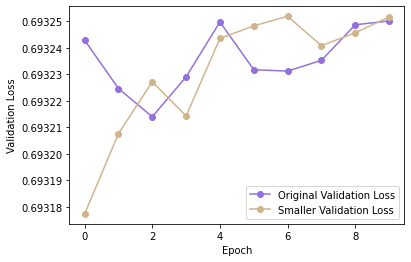

In [15]:
import matplotlib.pyplot as plt

epoch = 10
plt.plot(range(epoch), history.history['val_loss'], marker='o', color='mediumpurple', label='Original Validation Loss')
plt.plot(range(epoch), h1.history['val_loss'], marker='o', color='tan', label='Smaller Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [16]:
# 출력 유닛 1024
m2 = models.Sequential()
m2.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
m2.add(layers.Dense(1024, activation='relu'))
m2.add(layers.Dense(1, activation='sigmoid'))

In [18]:
m2.compile(optimizer='rmsprop',
           loss='binary_crossentropy',
           metrics=['acc'])

h2 = m2.fit(X_part, y_part,
            epochs=10, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 20s 636ms/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/10
30/30 [==============================] - 18s 617ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/10
30/30 [==============================] - 18s 600ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/10
30/30 [==============================] - 18s 605ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/10
30/30 [==============================] - 20s 663ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/10
30/30 [==============================] - 18s 601ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/10
30/30 [==============================] - 18s 600ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/10
30/30 [==============================] - 18s 601ms/step - 

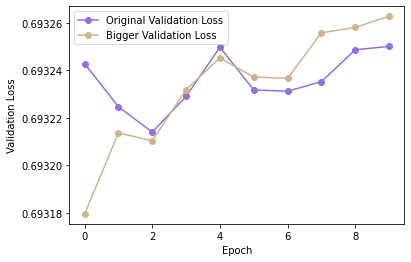

In [19]:
epoch = 10
plt.plot(range(epoch), history.history['val_loss'], marker='o', color='mediumpurple', label='Original Validation Loss')
plt.plot(range(epoch), h2.history['val_loss'], marker='o', color='tan', label='Bigger Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
# L2 규제 추가

# from keras import regularizers
# regularizers.l1(a) -> 라쏘
# regularizers.l2(a) -> 릿지
# regularizers.l1_l2(a) -> 엘라스틱넷

# a의 기본값은 모두 0.01

In [20]:
from keras import regularizers

m3 = models.Sequential()
m3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
m3.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
m3.add(layers.Dense(1, activation='sigmoid'))

In [21]:
m3.compile(optimizer='rmsprop',
           loss='binary_crossentropy',
           metrics=['acc'])

h3 = m3.fit(X_part, y_part,
            epochs=10, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 51ms/step - loss: 0.7106 - acc: 0.4970 - val_loss: 0.7046 - val_acc: 0.4947
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 0.7034 - acc: 0.5035 - val_loss: 0.7023 - val_acc: 0.4947
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.7012 - acc: 0.5035 - val_loss: 0.7003 - val_acc: 0.4947
Epoch 4/10
30/30 [==============================] - 1s 36ms/step - loss: 0.6994 - acc: 0.5035 - val_loss: 0.6986 - val_acc: 0.4947
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.6978 - acc: 0.5035 - val_loss: 0.6972 - val_acc: 0.4947
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.6966 - acc: 0.5035 - val_loss: 0.6961 - val_acc: 0.4947
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.6956 - acc: 0.5035 - val_loss: 0.6952 - val_acc: 0.4947
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.6948 - a

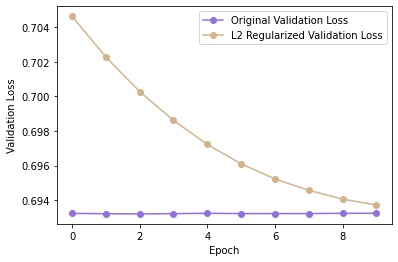

In [22]:
epoch = 10
plt.plot(range(epoch), history.history['val_loss'], marker='o', color='mediumpurple', label='Original Validation Loss')
plt.plot(range(epoch), h3.history['val_loss'], marker='o', color='tan', label='L2 Regularized Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

애초에 이상한 데이터 셋이라 해석하기도 마땅찮다